# Modèle text to speech


#Mise en place du modèle text to speech

##Import

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.0 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech
from datasets import load_dataset
import torch
from transformers import SpeechT5HifiGan
from IPython.display import Audio
import numpy as np
from scipy.io.wavfile import write

##Chargement du modèle

In [ ]:
processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

##Chargement du dataset


In [ ]:
embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")

speaker_embeddings = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

Generating validation split:   0%|          | 0/7931 [00:00<?, ? examples/s]

## Chargement du vocodeur

In [ ]:
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

## Selection des inputs

In [ ]:
text = "This is a test for the presentation"

inputs = processor(text=text, return_tensors="pt")

##Création du spectogramme

In [ ]:
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)

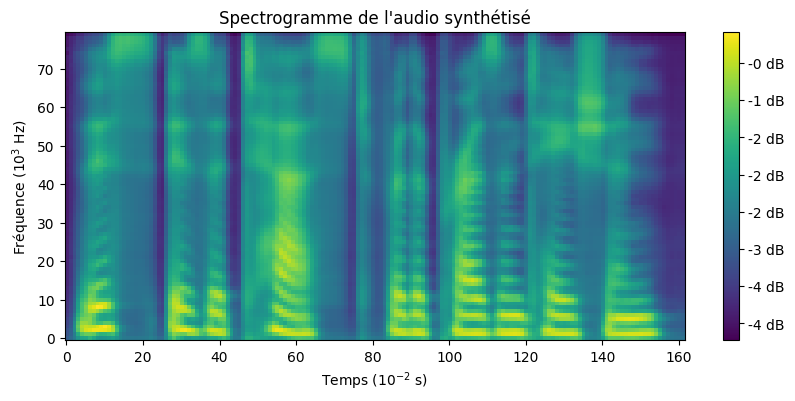

In [ ]:
# Convertir le tenseur PyTorch en tableau NumPy
spectrogram_np = spectrogram.numpy()

# Afficher le spectrogramme
plt.figure(figsize=(10, 4))
plt.imshow(spectrogram_np.T, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme de l\'audio synthétisé')
plt.xlabel('Temps ($10^{-2}$ s)')
plt.ylabel('Fréquence ($10^{3}$ Hz)')
plt.show()

##Création de l'audio

In [ ]:
speech = model.generate_speech(inputs["input_ids"], speaker_embeddings, vocoder=vocoder)
rate = 16000

In [ ]:
Audio(speech, rate = 16000)

##Enregistrement de l'audio

In [ ]:
speech_np = speech.cpu().numpy()
from google.colab import drive
drive.mount('/content/drive')

# Spécifiez le chemin du répertoire où vous souhaitez enregistrer le fichier audio
output_directory = "/content/drive/My Drive/"

# Définir le chemin de sortie pour le fichier audio
output_path = output_directory + "audio.wav"

# Enregistrez l'audio en utilisant la méthode write de scipy
write(output_path, rate, speech_np)

Mounted at /content/drive
